<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Object_Detection_Persian_Digit_Detection/blob/main/BIG_CNN_classifier_between_image_of_text_vs_nontext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier:

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np


In [71]:
from tensorflow.keras.utils import img_to_array


##Datas

In [ ]:
!wget https://github.com/iilabau/AUTNTdataset/tree/master/Training/Non-text

--2021-10-30 04:45:00--  https://github.com/iilabau/AUTNTdataset/tree/master/Training/Non-text
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Non-text’

Non-text                [ <=>                ]   1.55M  8.82MB/s    in 0.2s    

2021-10-30 04:45:01 (8.82 MB/s) - ‘Non-text’ saved [1623100]





####Link: https://www.kaggle.com/mhdaza/arabic-digits-dataset

and dataset arabic handwritten dataset:

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
!cp '/content/drive/MyDrive/MachineLearning/kaggle.json' -r /root/.kaggle

In [ ]:
# !cp '/content/kaggle.json' -r /content/drive/MyDrive/MachineLearning

In [ ]:
!chmod 600  /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mhdaza/arabic-digits-dataset

  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 76.6MB/s]


In [ ]:
!unzip /content/arabic-digits-dataset.zip

In [ ]:
!cp /content/Dataset -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

In [ ]:
# img=cv2.imread('/content/drive/MyDrive/MachineLearning/tx vs Ntx/Dataset/3/3_2.jpg')
# plt.imshow(img)



###Farsi Digit Dataset


In [101]:
import requests, io
import numpy as np


url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [102]:
X.shape

(102352, 32, 32)

In [103]:
im_h=X.shape[1]
im_w=X.shape[2]

Mine Digit dataset:

In [104]:
# copy ntxt dataset1 to ntx folder:
dj_img=[]
dj_label=[]
path='/content/drive/MyDrive/MachineLearning/ghabl/s_croped_png'
for img in os.listdir(path):
  img_p=os.path.join(path,img)
  image=cv2.imread(img_p)
  #some preprocessing commands:
  res=cv2.resize(image,(im_h,im_w))
  res=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
  res=img_to_array(res)
  dj_img.append(res)
  label=1
  dj_label.append(label)

dj_label=np.array(dj_label)
dj_img=np.array(dj_img,dtype='float')/255.0

In [105]:
X.shape

(102352, 32, 32)

In [106]:
dj_img.shape

(1600, 32, 32, 1)

In [107]:
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
X.shape

(102352, 32, 32, 1)

I merge mine data np-array to X,Y np-array 

In [108]:
X=np.concatenate((X, dj_img))

In [109]:
Y1=np.ones(X.shape[0],dtype='int')

In [110]:
X.shape

(103952, 32, 32, 1)




###we get the dataset of nontext images from here:

In [ ]:
!wget https://github.com/iilabau/AUTNTdataset/archive/refs/heads/master.zip

In [ ]:
!unzip /content/master.zip

In [ ]:
!cp /content/AUTNTdataset-master/Training/Non-text -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

In [ ]:
nTX_list=os.listdir('/content/drive/MyDrive/MachineLearning/tx vs Ntx/Non-text')

Dataset-2 link:
https://github.com/Vishwesh4/Text-vs-Non-Text-Classifier

In [ ]:
!git clone https://github.com/Vishwesh4/Text-vs-Non-Text-Classifier.git

Cloning into 'Text-vs-Non-Text-Classifier'...
remote: Enumerating objects: 437, done.
remote: Total 437 (delta 0), reused 0 (delta 0), pack-reused 437
Receiving objects: 100% (437/437), 2.06 MiB | 4.34 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
!cp /content/Text-vs-Non-Text-Classifier/text_nontext-dataset/nontext -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

In [ ]:
import shutil

In [64]:
# copy ntxt dataset1 to ntx folder:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearning/tx vs Ntx/nontext'):
  src=os.path.join('/content/drive/MyDrive/MachineLearning/tx vs Ntx/nontext',file1)
  dst='/content/drive/MyDrive/MachineLearning/tx vs Ntx/ntx'
  shutil.copy(src,dst)

In [65]:
len(os.listdir(dst))

177

In [66]:
# copy ntxt dataset2 to ntx folder:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearning/tx vs Ntx/Non-text'):
  src=os.path.join('/content/drive/MyDrive/MachineLearning/tx vs Ntx/Non-text',file1)
  dst='/content/drive/MyDrive/MachineLearning/tx vs Ntx/ntx'
  shutil.copy(src,dst)

In [67]:
len(os.listdir(dst))

2482

Dataset:
http://ebrahimpourlab.ir/download-dataset-sruphn/


In [ ]:
# !pip install unrar
# !unrar x /content/dataset-SRU-PHN.rar

In [ ]:
# !cp /content/data/bmp -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

In [69]:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearning/tx vs Ntx/bmp'):
  src=os.path.join('/content/drive/MyDrive/MachineLearning/tx vs Ntx/bmp',file1)
  dst='/content/drive/MyDrive/MachineLearning/tx vs Ntx/ntx'
  shutil.copy(src,dst)

In [70]:
len(os.listdir(dst))

25007

Dataset Shotor:https://www.kaggle.com/amir137825/persianocrdataset/version/1?select=Shotor_Words.csv

In [91]:
!kaggle datasets download -d amir137825/persianocrdataset

 78% 68.0M/87.4M [00:00<00:00, 60.4MB/s]
100% 87.4M/87.4M [00:01<00:00, 90.1MB/s]


In [ ]:
!unzip /content/persianocrdataset.zip

In [94]:
len(os.listdir('/content/Shotor_Images/Shotor_Images'))

120000

In [95]:
!cp /content/Shotor_Images/Shotor_Images -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

In [96]:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearning/tx vs Ntx/Shotor_Images'):
  src=os.path.join('/content/drive/MyDrive/MachineLearning/tx vs Ntx/Shotor_Images',file1)
  dst='/content/drive/MyDrive/MachineLearning/tx vs Ntx/ntx'
  shutil.copy(src,dst)

In [97]:
len(os.listdir(dst))

145007

In [98]:
src

'/content/drive/MyDrive/MachineLearning/tx vs Ntx/Shotor_Images/99999.tif'

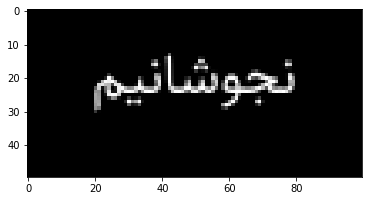

In [99]:
plt.imshow(cv2.imread(src))

In [100]:
path='/content/drive/MyDrive/MachineLearning/tx vs Ntx/ntx'
ntx_img=[]
labels=[]
for img in os.listdir(path):
  img_p=os.path.join(path,img)
  image=cv2.imread(img_p)
  #some preprocessing commands:
  res=cv2.resize(image,(im_h,im_w))
  res=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
  res=img_to_array(res)
  ntx_img.append(res)
  label=0
  labels.append(label)

labels=np.array(labels)
ntx_img=np.array(ntx_img,dtype='float')/255.0



###Merging txt and ntxt datasets:

In [ ]:
# now I merge digit numpy-array to nontxt numpy-array:

Dataset: https://www.kaggle.com/amir137825/persianocrdataset

In [ ]:
kaggle datasets download -d amir137825/persianocrdataset

In [ ]:
# Y.shape

(102352,)

In [ ]:
# Y1=np.ones(Y.shape[0],dtype='int')

In [ ]:
# Y1

In [111]:
X.shape

(103952, 32, 32, 1)

In [ ]:
# X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

In [ ]:
# X.shape

(102352, 32, 32, 1)

In [112]:
ntx_img.shape

(145007, 32, 32, 1)

In [113]:
x=np.concatenate((X, ntx_img))

In [114]:
x.shape

(248959, 32, 32, 1)

In [115]:
y=np.concatenate((Y1,labels))
y.shape

(248959,)

In [116]:
from sklearn.utils import shuffle
x, y = shuffle(x,y, random_state = 0 )


##Binery classsifier Model:


###Prepairing the train and test split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.2, random_state=42, shuffle=True)



###Prepairing the model

In [119]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

In [120]:
x.shape

(248959, 32, 32, 1)

In [121]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(x.shape[1],x.shape[2],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [123]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [124]:
model_hist=model.fit(x_train,y_train,epochs=3,validation_split=.2)

Epoch 1/3
4980/4980 [==============================] - 213s 42ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0035 - val_accuracy: 0.9988
Epoch 2/3
4980/4980 [==============================] - 215s 43ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0069 - val_accuracy: 0.9974
Epoch 3/3
4980/4980 [==============================] - 213s 43ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 0.9994


In [125]:
yp=model.predict(x_test)


In [126]:
yp=yp.reshape(-1)

In [127]:
yp=np.array(yp,dtype='int')

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(yp,y_test)

0.9920268316195373

In [130]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp,normalize='true')

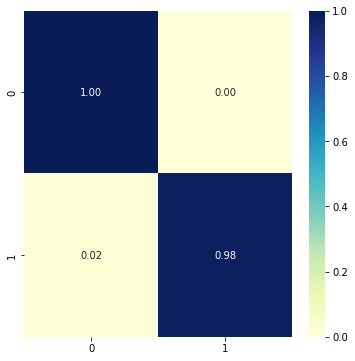

In [131]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
sn.heatmap(cm, annot=True, fmt='.2f', cmap='YlGnBu')



###Accuracy and loss visualization 

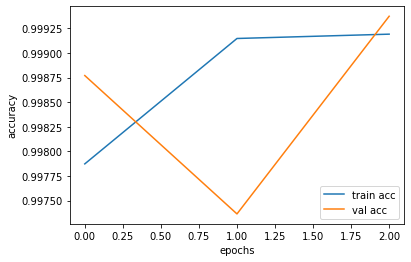

In [132]:
plt.plot(model_hist.history['accuracy'],label='train acc')
plt.plot(model_hist.history['val_accuracy'],label='val acc')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show();

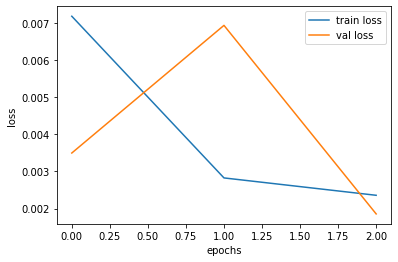

In [133]:
plt.plot(model_hist.history['loss'],label='train loss')
plt.plot(model_hist.history['val_loss'],label='val loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();



###Save and Load Model:

In [134]:
model_path='/content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf_big'
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf_big/assets


In [135]:
from keras.models import load_model

In [ ]:
model_path='/content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf'
model=load_model(model_path)

##now we test classifier for extracted objects from image: 

In [136]:
im_h=32
im_w=32

In [137]:
slice_path='/content/drive/MyDrive/MachineLearning/ghabl/slice'

ntx_img=[]
for img in os.listdir(slice_path):
  img_p=os.path.join(slice_path,img)
  image=cv2.imread(img_p)
  #some preprocessing commands:
  image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)
  image=cv2.resize(image,(im_h,im_w), interpolation=cv2.INTER_AREA)
  
  image=img_to_array(image)
  ntx_img.append(image)
  

labels=np.array(labels)
ntx_img=np.array(ntx_img,dtype='float')/255.0

In [138]:
ntx_img.shape

(13, 32, 32, 1)

In [139]:
labels=model.predict(ntx_img)

In [140]:
labels=labels.reshape(-1)
labels=np.array(labels)

In [141]:
labels

array([1.0000000e+00, 9.9998260e-01, 1.0000000e+00, 9.9999923e-01,
       1.0000000e+00, 1.0000000e+00, 4.8951087e-25, 1.0000000e+00,
       9.9999928e-01, 1.0000000e+00, 1.0000000e+00, 9.9999189e-01,
       1.0000000e+00], dtype=float32)

In [142]:
dig_l=np.where(labels > .5, 1,0)

In [143]:
i=0
dig_img=[]
slice_path='/content/drive/MyDrive/MachineLearning/ghabl/slice'
for img in os.listdir(slice_path):
  img_p=os.path.join(slice_path,img)
  image=cv2.imread(img_p)
  # plt.figure(i)
  # imgplot = plt.imshow(image)
  # plt.show()
  # print(dig_l[i])
  if dig_l[i]==1:dig_img.append(image)
  i += 1

#Image Test:


##Preprocessing:

In [159]:
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

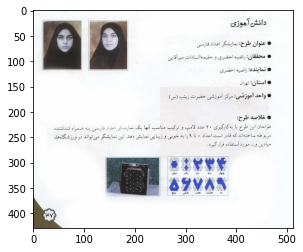

In [160]:
input_image_path='/content/12.jpg'
image=cv2.imread(input_image_path)
plt.imshow(image);

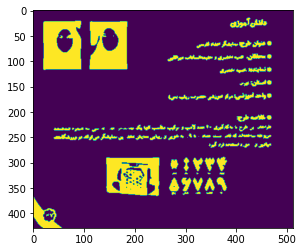

In [161]:
dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (7,7), 1)

thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)

plt.imshow(thresh)

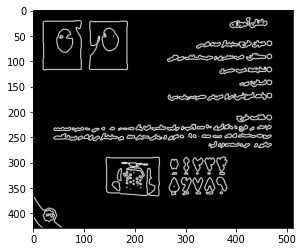

In [162]:
from skimage.filters import sobel
el=sobel(thresh)
plt.imshow(el,cmap=plt.cm.gray)

Segmentations are extraxted:

In [163]:
thresh = threshold_otsu(el)
bw = closing(el > thresh, square(3))

cleared=clear_border(bw)

label_image=label(cleared)

image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

We keep only segmentations with area bigger than a threshold:

In [164]:
image_boxs=[]
image_slices=[]
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented 
        minr, minc, maxr, maxc = region.bbox
        image_boxs.append([minc,minr, maxc,maxr])
        img=image[minr:maxr, minc:maxc]
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_slices.append(img)


We recreate sliced images from recognized objects to give the classifier:

In [165]:
x_img=[]
for image in image_slices:
  
  #some preprocessing commands:
  image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)
  image=cv2.resize(image,(im_h,im_w), interpolation=cv2.INTER_AREA)
  
  image=img_to_array(image)
  x_img.append(image)
  


x_img=np.array(x_img,dtype='float')/255.0

We give Slices to Model:

In [166]:
labels=model.predict(x_img)

In [167]:
labels=labels.reshape(-1)
labels=np.array(labels)

In [168]:
dig_l=np.where(labels > .5, 1,0)

In [169]:
dig_l

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1])

We gather the box of slices which are recognized as dijits by classifier:

In [170]:
input_image_path='/content/12.jpg'
image=cv2.imread(input_image_path)
orig=image

i=0

for img in x_img:
 
  # plt.figure(i)
  # imgplot = plt.imshow(image)
  # plt.show()
  # print(dig_l[i])
  if dig_l[i]==1:
    
    startX = image_boxs[i][0]
    startY = image_boxs[i][1]
    endX = image_boxs[i][2]
    endY = image_boxs[i][3]
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
  i += 1



###Persian Digit segmentaion:

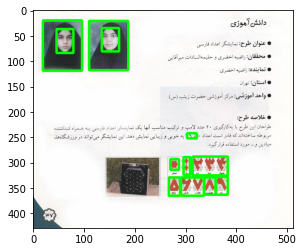

In [171]:
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

Infact, the classifier consider faces as 0 number, that is why they are included. 

In [ ]:
image_boxs[1][0]

154



###All the segmentations including non dijits:

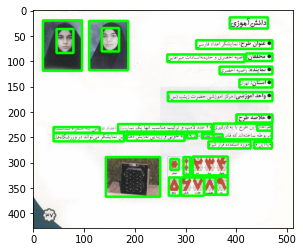

In [172]:
i=0

for img in x_img:
 
  # plt.figure(i)
  # imgplot = plt.imshow(image)
  # plt.show()
  # print(dig_l[i])
  
    
  startX = image_boxs[i][0]
  startY = image_boxs[i][1]
  endX = image_boxs[i][2]
  endY = image_boxs[i][3]
  cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
  i += 1

plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))